# BanknoteAuthentication Dataset

Responsibility : Mohamed Khaled

## Imports

In [4]:
# For data manipulation and analysis
import pandas as pd
import numpy as np

# For data preprocessing
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split

# For implementing ensemble models
from sklearn.ensemble import (
    RandomForestClassifier,
    AdaBoostClassifier,
    GradientBoostingClassifier,
)

# For hyperparameter tuning
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV

# For model evaluation
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# For visualization
import matplotlib.pyplot as plt
import seaborn as sns

## Dataset Selection

In [7]:
df = pd.read_csv(
    "./AMLAss1Datasets/data_banknote_authentication.csv"
)  # Suitable for classification

##  Preprocessing
* Dataset has no nulls
* All columns will be used in our project
* Scaling the numerical features 
    ```python
    StandardScaler() #Scaling data to fit a standard normal distribution
    ```
* Removing outliers using `IQR` method

In [8]:
# Renaming the columns
df.columns = [
    "variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy", "class"
]

In [9]:
# Scaling the numerical features
scaler = StandardScaler()
df[["variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy"]] = scaler.fit_transform(
    df[["variance_wavelet", "skewness_wavelet", "curtosis_wavelet", "image_entropy"]]
)

In [10]:
df.head()

,variance_wavelet,skewness_wavelet,curtosis_wavelet,image_entropy,class
0,1.121806,1.149455,-0.975970,0.354561,0
1,1.447066,1.064453,-0.895036,-0.128767,0
2,1.207810,-0.777352,0.122218,0.618073,0
3,1.063742,1.295478,-1.255397,-1.144029,0
4,-0.036772,-1.087038,0.736730,0.096587,0


# Models

## Model Implementation & Hyperparameter Turning

References :
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.AdaBoostClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingClassifier.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.GridSearchCV.html
* https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.RandomizedSearchCV.html

In [11]:
# Train test split
X = df.drop("class", axis=1)
y = df["class"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Random Forest

In [17]:
# Extra Imports
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

In [18]:
rf = RandomForestClassifier()
rf.fit(X_train, y_train)
y_pred = rf.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 0.9927272727272727
Precision: 1.0
Recall: 0.984251968503937
F1 Score: 0.9920634920634921


### Hyperparametre Tuning
- Defined a range of estimators, features and bootstrap state
- These are then used to figure out the best parametres using GridSearchCV()
- The model trains on the dataset then predictions are done
- Evaluations are calculated and shown

#### Choosing the correct number of trees

In [19]:
# Having a range of parameters to test
n = [64, 100, 128, 200]
max_features = ["sqrt", "log2"]
bootstrap = [True, False]

In [20]:
param_grid = {
    "n_estimators": n,
    "max_features": max_features,
    "bootstrap": bootstrap,
}

clf = GridSearchCV(rf, param_grid, cv=10, scoring="accuracy")
clf.fit(X_train, y_train)
print("Best Parameters:", clf.best_params_)
print("Best Accuracy:", clf.best_score_)

Best Parameters: {'bootstrap': True, 'max_features': 'sqrt', 'n_estimators': 100}
Best Accuracy: 0.9927105921601335


In [21]:
# Training the model with the best parameters
rf_best = RandomForestClassifier(
    n_estimators=clf.best_params_["n_estimators"],
    max_features=clf.best_params_["max_features"],
    bootstrap=clf.best_params_["bootstrap"],
)

rf_best.fit(X_train, y_train)

RandomForestClassifier()

In [22]:
# Predictions
y_pred = rf_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying the prediction evals
print("Random Forest Classifier")
print("Accuracy:", accuracy)
print("Confusion Matrix:", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Random Forest Classifier
Accuracy: 0.9927272727272727
Confusion Matrix: [[148   0]
 [  2 125]]
Precision: 1.0
Recall: 0.984251968503937
F1 Score: 0.9920634920634921


## AdaBoost

In [23]:
# AdaBoost
ada = AdaBoostClassifier()
ada.fit(X_train, y_train)
y_pred = ada.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

c:\Python312\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


Accuracy: 0.9963636363636363
Precision: 1.0
Recall: 0.9921259842519685
F1 Score: 0.9960474308300395


### Hyperparametre Tuning
- Defined a range of estimators, learning rates, random values and the boosting algortithm to use
- These are then used to figure out the best parametres using GridSearchCV()
- The model trains on the dataset then predictions are done
- Evaluations are calculated and shown

In [2]:
# Having a range of parameters to test
n_ada = [64, 100, 200, 500, 700, 1000]
learning_rate = [0.1, 0.5, 1, 1.5, 2.0]
random = [None, 42]
algorithm = ["SAMME"]

In [25]:
param_grid = {
    "n_estimators": n_ada,
    "learning_rate": learning_rate,
    "random_state": random,
    "algorithm": algorithm,
}

clf = GridSearchCV(ada, param_grid, cv=10, scoring="accuracy")
clf.fit(X_train, y_train)
print("Best Parameters:", clf.best_params_)
print("Best Accuracy:", clf.best_score_)

Best Parameters: {'algorithm': 'SAMME', 'learning_rate': 0.5, 'n_estimators': 500, 'random_state': None}
Best Accuracy: 0.9981734778982485


In [26]:
# Training the model with the best parameters
ada_best = AdaBoostClassifier(
    n_estimators=clf.best_params_["n_estimators"],
    learning_rate=clf.best_params_["learning_rate"],
    random_state=clf.best_params_["random_state"],
    algorithm=clf.best_params_["algorithm"],
)

ada_best.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME', learning_rate=0.5, n_estimators=500)

In [27]:
# Predictions
y_pred = ada_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
cm = confusion_matrix(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying the prediction evals
print("AdaBoost Classifier")
print("Accuracy:", accuracy)
print("Confusion Matrix:", cm)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

AdaBoost Classifier
Accuracy: 0.9963636363636363
Confusion Matrix: [[148   0]
 [  1 126]]
Precision: 1.0
Recall: 0.9921259842519685
F1 Score: 0.9960474308300395


## Gradient Boost

In [12]:
# Gradient Boosting
gb = GradientBoostingClassifier()
gb.fit(X_train, y_train)
y_pred = gb.predict(X_test)

# Evaluating the model
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

print(f"Accuracy: {accuracy}")
print(f"Precision: {precision}")
print(f"Recall: {recall}")
print(f"F1 Score: {f1}")

Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


### Hyperparametre Tuning

In [13]:
# Having a range of parameters to test
n_gb = [64, 100, 200, 500, 700, 1000]
learning_rate = [0.1, 0.5, 1, 1.5, 2.0]
loss = ["log_loss", "exponential"]

In [14]:
param_grid = {
    "n_estimators": n_gb,
    "learning_rate": learning_rate,
    "loss": loss,
}

clf = GridSearchCV(gb, param_grid, cv=10, scoring="accuracy")
clf.fit(X_train, y_train)
print("Best Parameters:", clf.best_params_)
print("Best Accuracy:", clf.best_score_)

Best Parameters: {'learning_rate': 2.0, 'loss': 'exponential', 'n_estimators': 64}
Best Accuracy: 0.9990825688073395


In [15]:
# Training the model with the best parameters
gb_best = GradientBoostingClassifier(
    n_estimators=clf.best_params_["n_estimators"],
    learning_rate=clf.best_params_["learning_rate"],
    loss=clf.best_params_["loss"],
)

gb_best.fit(X_train, y_train)

GradientBoostingClassifier(learning_rate=2.0, loss='exponential',
                           n_estimators=64)

In [17]:
# Predictions
y_pred = gb_best.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Displaying the prediction evals
print("Gradient Boosting Classifier")
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1 Score:", f1)

Gradient Boosting Classifier
Accuracy: 1.0
Precision: 1.0
Recall: 1.0
F1 Score: 1.0


In [34]:
# Comparing the performance of the models
models = [
    "Random Forest Classifier",
    "Random Forest Classifier with best hyperparameters",
    "AdaBoost Classifier",
    "AdaBoost Classifier with best hyperparameters",
    "Gradient Boosting Classifier",
    "Gradient Boosting Classifier with best hyperparameters",
]

accuracies = [
    accuracy_score(y_test, rf.predict(X_test)),
    accuracy_score(y_test, rf_best.predict(X_test)),
    accuracy_score(y_test, ada.predict(X_test)),
    accuracy_score(y_test, ada_best.predict(X_test)),
    accuracy_score(y_test, gb.predict(X_test)),
    accuracy_score(y_test, gb_best.predict(X_test)),
]

precisions = [
    precision_score(y_test, rf.predict(X_test), zero_division=1),
    precision_score(y_test, rf_best.predict(X_test), zero_division=1),
    precision_score(y_test, ada.predict(X_test), zero_division=1),
    precision_score(y_test, ada_best.predict(X_test), zero_division=1),
    precision_score(y_test, gb.predict(X_test), zero_division=1),
    precision_score(y_test, gb_best.predict(X_test), zero_division=1),
]

recalls = [
    recall_score(y_test, rf.predict(X_test), zero_division=1),
    recall_score(y_test, rf_best.predict(X_test), zero_division=1),
    recall_score(y_test, ada.predict(X_test), zero_division=1),
    recall_score(y_test, ada_best.predict(X_test), zero_division=1),
    recall_score(y_test, gb.predict(X_test), zero_division=1),
    recall_score(y_test, gb_best.predict(X_test), zero_division=1),
]

f1_scores = [
    f1_score(y_test, rf.predict(X_test), zero_division=1),
    f1_score(y_test, rf_best.predict(X_test), zero_division=1),
    f1_score(y_test, ada.predict(X_test), zero_division=1),
    f1_score(y_test, ada_best.predict(X_test), zero_division=1),
    f1_score(y_test, gb.predict(X_test), zero_division=1),
    f1_score(y_test, gb_best.predict(X_test), zero_division=1),
]

model_comparison = pd.DataFrame({
    "Model": models,
    "Accuracy": accuracies,
    "Precision": precisions,
    "Recall": recalls,
    "F1 Score": f1_scores,
})

model_comparison

,Model,Accuracy,Precision,Recall,F1 Score
0,Random Forest Classifier,0.992727,1.0,0.984252,0.992063
1,Random Forest Classifier with best hyperparame...,0.992727,1.0,0.984252,0.992063
2,AdaBoost Classifier,0.996364,1.0,0.992126,0.996047
3,AdaBoost Classifier with best hyperparameters,0.996364,1.0,0.992126,0.996047
4,Gradient Boosting Classifier,1.000000,1.0,1.000000,1.000000
5,Gradient Boosting Classifier with best hyperpa...,1.000000,1.0,1.000000,1.000000


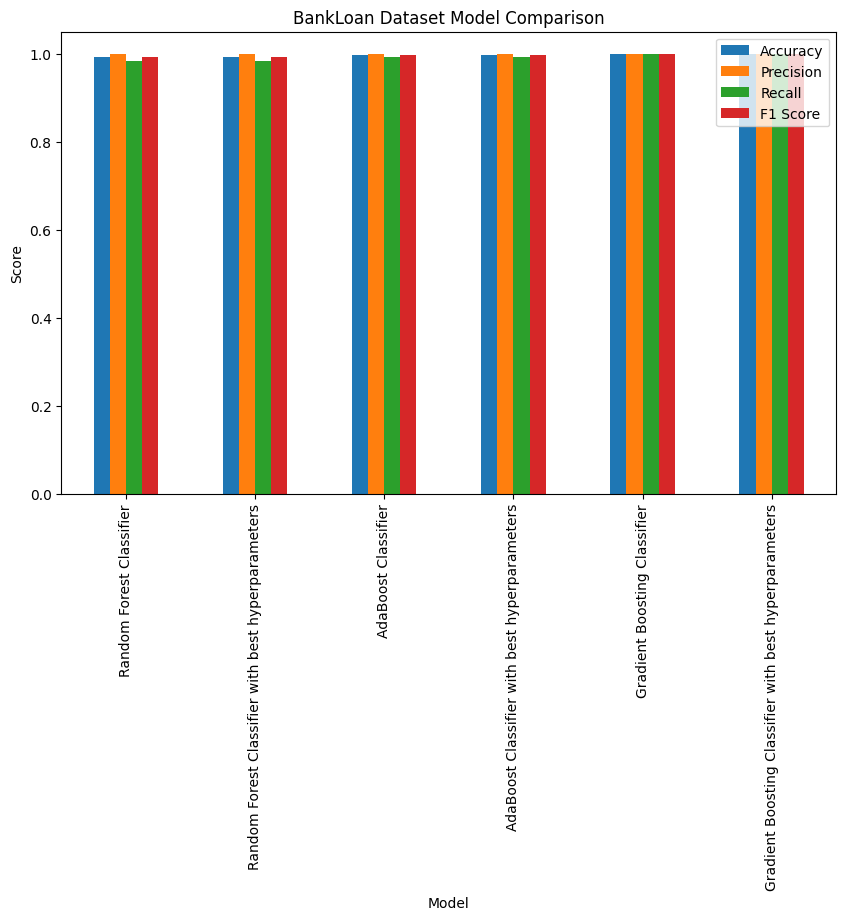

In [35]:
# Another type of plot
model_comparison.plot(kind="bar", x="Model", figsize=(10, 6))

plt.title("BankLoan Dataset Model Comparison")
plt.xlabel("Model")
plt.ylabel("Score")
plt.xticks(rotation=90)
plt.show()

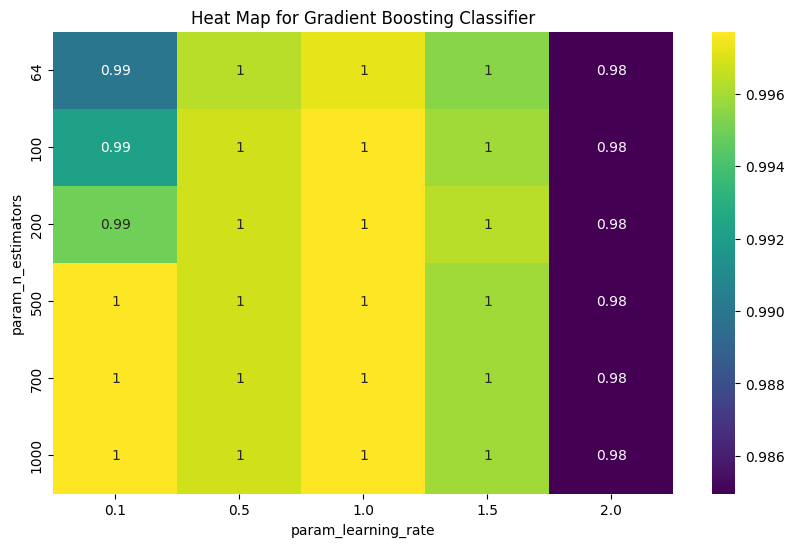

In [19]:
# Heat map for Gradient Boost Classifier
#chose 2 of the hyperparamters to visualize, the number of estimators and the learning rate
gb_grid_results = pd.DataFrame(clf.cv_results_)
gb_grid_results = gb_grid_results.sort_values(
    by=["param_n_estimators", "param_learning_rate"]
)

gb_grid_results_pivot = gb_grid_results.pivot_table(
    index="param_n_estimators",
    columns="param_learning_rate",
    values="mean_test_score",
)

plt.figure(figsize=(10, 6))
sns.heatmap(gb_grid_results_pivot, annot=True, cmap="viridis")
plt.title("Heat Map for Gradient Boosting Classifier")
plt.show()